## Working with Pandas

Pandas is a Python module built on top of Numpy, allowing users to store and manipulate flexible data array objects with row and column headers. Essentially, it provides some Excel-like functionality to Python. The core of pandas is the <b>DataFrame</b>, which you can think of as a table (or numpy recarray) that supports any kind of data and has explicit labels for rows and columns. 

Before getting into DataFrames, let's first discuss the <b>Series</b> object -- pandas' version of an array, but it has some unique properties. For example, it can be indexed by non-integer data (unlike numpy arrays): 

In [113]:
import pandas as pd
import numpy as np

#Create a new Series object with strings as indices. By default, Series will come with standard integer indices.
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [115]:
#data can be retrieved via string indices (like a Python dictionary)
data['b']

0.5

In [117]:
#or even more dramatically:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [120]:
#Series objects can be sliced, just like numpy arrays
population['California':'New York']

California    38332521
Texas         26448193
New York      19651127
dtype: int64

A DataFrame is a sequence of of aligned Series objects, essentially turning indexed lists into indexed 2D arrays, or tables. For example, let's create a table of information about our states: 

In [122]:
#Create a new Series object with info about state areas
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [123]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [125]:
#See which indices we're using
print(states.index)

#See our column headers
print(states.columns)

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Index(['population', 'area'], dtype='object')


Do note that indexing into DataFrames works a little differently than arrays. In many ways, pandas objects are more like dictionaries than arrays (but really, more of a dictionary-array hybrid):

In [127]:
#Try running states[0]

In [129]:
#But now try
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [138]:
#Also note that using a column name as an attribute will work
states.population

#though in general the dictionary-style indexing is safer and can work with non-strings.

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

Sometimes you really want to go back to the implicit integer index. There's a really easy way to do this, the iloc indexer: 

In [136]:
#Get the data for 'California' without using the explicit index
states.iloc[0]

population    38332521
area            423967
Name: California, dtype: int64

In [142]:
#Want to add a new column? It's easy! Just as if you were manipulating a Python dictionary
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [143]:
#Pandas methods even support combinations of indexing/slicing/masking. The 'loc' method lets us only refer to explicit indices (the opposite of the iloc method)
states.loc[states['density']>100, ['population', 'density']]

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


### Manipulating pandas DataFrames

Pandas has some fantastic string methods for finding and manipulating data in a DataFrame.

In [191]:
data = ['peter', 'Paul', 'MARY', 'gEORGE', 'mark']
names = pd.Series(data)
names

0     peter
1      Paul
2      MARY
3    gEORGE
4      mark
dtype: object

In [192]:
names.str.capitalize()

0     Peter
1      Paul
2      Mary
3    George
4      Mark
dtype: object

In [193]:
names.str.endswith('l')

0    False
1     True
2    False
3    False
4    False
dtype: bool

Particularly useful is the .contains() method, which can be used to find strings where they appear in a column. 

In [194]:
names.loc[:] = names.str.capitalize()  #first lets standardize the capitalization
names.str.contains('ar')

0    False
1    False
2     True
3    False
4     True
dtype: bool

Masking and the .query() method are your friends. You'll find yourself using these often to access subarrays of a dataframe. For example...

In [195]:
#Similar to an example we looked at before
states[states['density']>100]

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


In [196]:
#Which could also be written as:
states.query('density>100')

,population,area,density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


This is just a taste of some of the most useful functionality in Pandas. For a full overview of all pandas functionality, check out this tutorial: https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html

## Explore the RAM database

The CML's database of intracranial and scalp EEG comes in a pandas dataframe format. All the pertinent data about each experimental session is recorded in a row of a large dataframe. These databases are organized around experimental protocols. For example, the <b>'r1'</b> database contains all DARPA RAM data, while the **'pyfr'** database includes all free-recall intracranial data collected in the years prior to RAM. 

Let's load the RAM database to get a better sense of these formats. We're going to use **CMLReaders**, which is a custom library with helper functions to load data for any experiments run by the CML. If you don't already have CMLReaders installed, please follow the instructions here: https://github.com/pennmem/cmlreaders

In [205]:
#First, our import statements. The CMLReader class is your gateway to all experimental data, including electrodes and EEG. The get_data_index function specifically loads experimental databases. 
from cmlreaders import CMLReader, get_data_index

#The "r1" database corresponds to all of the RAM subjects. Use "pyfr" for the pre-RAM iEEG data.
df = get_data_index("r1")

In [53]:
#This dataframe contains all the information about every experimental sessions collected in the RAM project
df[:10]

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1001P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...
1,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1001P/experiments/FR1/s...,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR1/s...
2,NaN,protocols/r1/subjects/R1001P/experiments/FR2/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR2,build,0,protocols/r1/subjects/R1001P/experiments/FR2/s...,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR2/s...
3,NaN,protocols/r1/subjects/R1001P/experiments/FR2/s...,protocols/r1/subjects/R1001P/localizations/0/m...,FR2,build,0,protocols/r1/subjects/R1001P/experiments/FR2/s...,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/FR2/s...
4,NaN,protocols/r1/subjects/R1001P/experiments/PAL1/...,protocols/r1/subjects/R1001P/localizations/0/m...,PAL1,build,0,protocols/r1/subjects/R1001P/experiments/PAL1/...,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/PAL1/...
5,NaN,protocols/r1/subjects/R1001P/experiments/PAL1/...,protocols/r1/subjects/R1001P/localizations/0/m...,PAL1,build,0,protocols/r1/subjects/R1001P/experiments/PAL1/...,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/PAL1/...
6,NaN,NaN,protocols/r1/subjects/R1001P/localizations/0/m...,YC1,conversion,0,NaN,0,NaN,0,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,0,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/YC1/s...
7,NaN,NaN,protocols/r1/subjects/R1001P/localizations/0/m...,YC1,conversion,0,NaN,0,NaN,1,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,1,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/YC1/s...
8,NaN,NaN,protocols/r1/subjects/R1001P/localizations/0/m...,YC1,conversion,0,NaN,0,NaN,2,protocols/r1/subjects/R1001P/localizations/0/m...,NaN,2,R1001P,R1001P,NaN,protocols/r1/subjects/R1001P/experiments/YC1/s...
9,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...,protocols/r1/subjects/R1002P/localizations/0/m...,FR1,build,0,protocols/r1/subjects/R1002P/experiments/FR1/s...,0,NaN,0,protocols/r1/subjects/R1002P/localizations/0/m...,NaN,0,R1002P,R1002P,NaN,protocols/r1/subjects/R1002P/experiments/FR1/s...


In [11]:
#Let's see what experiments we have access to
df['experiment'].unique()

array(['FR1', 'FR2', 'PAL1', 'YC1', 'PAL2', 'catFR1', 'YC2', 'catFR2',
       'PS1', 'PS3', 'PS2', 'TH1', 'FR3', 'PS2.1', 'PAL3', 'TH3',
       'catFR3', 'FR5', 'PS4_catFR', 'THR', 'PS4_FR', 'PAL5', 'THR1',
       'catFR5', 'FR6', 'PS5_catFR', 'catFR6', 'TICL_FR',
       'LocationSearch', 'TICL_catFR', 'PS4_catFR5'], dtype=object)

**Exercise: How many RAM sessions were run on Jefferson subjects?**

In [156]:
np.sum(df['subject'].str.endswith('J'))

414

### Verbal free-recall tasks (no-stim)
* FR1
* catFR1

### Paired-associates tasks
* PAL1
* PAL2 (open-loop stim)
* PAL3 (closed-loop stim)
* PAL5 (closed-loop stim)

### Spatial navigation tasks
* YC1
* TH1
* THR
* THR1
* YC2 (open-loop stim)
* TH3 (closed-loop stim)

### Verbal free-recall w/ stim
(Basically, any FR task with a number above 1 somewhere)
* FR2 (open-loop)
* catFR2
* FR3 (closed-loop)
* catFR3
* FR5 (closed-loop)
* catFR5
* PS4_FR (closed-loop)
* PS4_catFR (closed-loop)
* PS5_catFR (closed-loop)
* FR6 (multi-target stim)
* catFR6 (multi-target stim)
* TICL_FR (encoding/math/retrieval stim)

### No-task stimulation ("parameter search")
* PS1
* PS2/PS2.1
* PS3
* LocationSearch


In [206]:
len(df[(df['experiment']=='FR1') | (df['experiment']=='catFR1')]['subject'].unique())

327

In [207]:
len(df[df['experiment'].str.contains('FR1')]['subject'].unique())

327

In [208]:
#And now let's find all the subjects who did the FR1 task
fr1_df = df.query('experiment == "FR1"')
fr1_df['subject'].unique()

array(['R1001P', 'R1002P', 'R1003P', 'R1006P', 'R1010J', 'R1015J',
       'R1018P', 'R1020J', 'R1022J', 'R1023J', 'R1026D', 'R1027J',
       'R1030J', 'R1031M', 'R1032D', 'R1033D', 'R1034D', 'R1035M',
       'R1036M', 'R1039M', 'R1042M', 'R1044J', 'R1045E', 'R1048E',
       'R1049J', 'R1050M', 'R1051J', 'R1052E', 'R1053M', 'R1054J',
       'R1056M', 'R1057E', 'R1059J', 'R1060M', 'R1061T', 'R1062J',
       'R1063C', 'R1065J', 'R1066P', 'R1067P', 'R1068J', 'R1069M',
       'R1070T', 'R1074M', 'R1075J', 'R1076D', 'R1077T', 'R1080E',
       'R1081J', 'R1083J', 'R1084T', 'R1086M', 'R1089P', 'R1092J',
       'R1093J', 'R1094T', 'R1096E', 'R1098D', 'R1100D', 'R1101T',
       'R1102P', 'R1104D', 'R1105E', 'R1106M', 'R1108J', 'R1111M',
       'R1112M', 'R1113T', 'R1114C', 'R1115T', 'R1118N', 'R1120E',
       'R1121M', 'R1122E', 'R1123C', 'R1124J', 'R1125T', 'R1127P',
       'R1128E', 'R1129D', 'R1130M', 'R1131M', 'R1134T', 'R1135E',
       'R1136N', 'R1137E', 'R1138T', 'R1142N', 'R1145J', 'R114

### Load data from an example subject
Here, let's go through an example of loading experimental events and EEG from one subject

In [17]:
#First, our import statements
from cmlreaders import CMLReader, get_data_index

#The "r1" database corresponds to all of the RAM subjects
df = get_data_index("r1")

#Specify which subject and experiment we want
sub = 'R1001P'
exp = 'FR1'

#Find out the sessions, localization, and montage for this subject
sessions = list(df[(df['subject']==sub) & (df['experiment']==exp)]['session'])
mont = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['montage'])      #note that *usually* mont and loc will be 0.
loc = int(df[(df['subject']==sub) & (df['experiment']==exp)].iloc()[0]['localization'])

In [18]:
print(sub+' sessions: '+str(sessions))
print(sub+' montage: '+str(mont))
print(sub+' localization: '+str(loc))

R1001P sessions: [0, 1]
R1001P montage: 0
R1001P localization: 0


<i>Usually, montage and localization are both zero, meaning a subject had only one surgery and the subset of recorded electrodes did not change. But not always!</i>

<b>Montage:</b> Refers to set of a subject's electrodes that were recorded in a given experimental session.

<b>Localization:</b> A subject will get a new localization if they were reimplanted after another surgery. Therefore, electrodes may be in different places altogether. 

This subject completed two sessions of FR1, and only had one montage/localization. Let's load data from the first session. First, we'll need to instantiate an instance of the 'CMLReader' object, which is the object class for accessing any CML data. Think of it as a "finder" for any kind of experimental data. At a minimum, you'll need to give it a subject and experiment for it to find anything.

In [52]:
#For first session...
reader = CMLReader(sub, exp, sessions[0], montage=mont, localization=loc)   #reader for loading CML data

#What kind of data can the reader get for us?
reader.reader_names.keys()

dict_keys(['voxel_coordinates', 'jacksheet', 'classifier_excluded_leads', 'good_leads', 'leads', 'area', 'electrode_coordinates', 'prior_stim_results', 'target_selection_table', 'experiment_log', 'all_events', 'events', 'math_events', 'ps4_events', 'task_events', 'used_classifier', 'baseline_classifier', 'sources', 'eeg', 'matlab_contacts', 'matlab_pairs', 'pairs', 'contacts', 'localization', 'electrode_categories', 'classifier_summary', 'session_summary', 'math_summary'])

Many of these readers aren't necessary for day-to-day analyses. We'll focus on how to reader experimental events, electrode information, and EEG. 

#### Load experimental events

In [59]:
evs = reader.load('task_events')  #'events' will also do, but you'll get some extra stuff

The events dataframe contains information about everything that happened during an experimental session. It indicates the time at which every word appeared on the screen, and when those words were later recalled. It also contains information about events that you might not care about, such as when the countdown timer starts and ends.
<center>
<img src="https://github.com/esolomon/PythonBootcamp2019/blob/master/figures/task_design-01.jpg?raw=true" width=650>
</center>
Let's take a look at all the columns in this dataframe.

In [60]:
evs.columns

Index(['eegoffset', 'eegfile', 'exp_version', 'experiment', 'intrusion',
       'is_stim', 'item_name', 'item_num', 'list', 'montage', 'msoffset',
       'mstime', 'protocol', 'recalled', 'rectime', 'serialpos', 'session',
       'stim_list', 'stim_params', 'subject', 'type'],
      dtype='object')

* 'eegoffset' indicates where (in samples) in the EEG file this event occurred. CMLReaders needs this info, but usually you won't need to deal with it directly.
* 'eegfile' is the path to the corresponding file where raw EEG is saved.
* 'experiment' is the behavioral task we're looking at. 
* 'intrusion' is an indicator of intrusion events during the recall period. -1 indicates an extra-list intrusion, otherwise, it's the list number from which the word came.
* 'is_stim' flags whether stimulation occurred during this event. We won't be dealing with stimulation data in this bootcamp. 
* <b>'item_name'</b> is the word that was presented or recalled.
* 'item_num' is the index for this word in the word pool. 
* 'list' is the list number. 
* 'montage' is the subject montage, which you loaded earlier.
* 'mstime' is a time indicator, in ms. Good for comparing between events, but the absolute value is meaningless. 
* <b>'recalled'</b> is a indicator of whether an encoding word was later recalled successfully.
* 'rectime' is the time, in ms, when a word was recalled relative to the start of the recall period for that list.
* <b>'serialpos'</b> is the serial position of a presented/recalled word
* 'stim_list' is an indicator of whether stimulation was active during this list. 
* 'stim_params' is a dictionary of stimulation parameters.
* 'subject' is the subject you're analyzing!
* <b>'type'</b> is the type of event, e.g. 'WORD' or 'REC_WORD'

Please see https://pennmem.github.io/cmlreaders/html/events.html for even more information!

Say we're just interested in analyzing word encoding events. To filter by event type, use handy pandas functionality:

In [169]:
pd.set_option('display.max_columns', 100)  #an optional command that lets us view the full dataframe within Jupyter notebooks

In [170]:
word_evs = evs[evs['type']=='WORD']
word_evs[:10]

,eegoffset,eegfile,exp_version,experiment,intrusion,is_stim,item_name,item_num,list,montage,msoffset,mstime,protocol,recalled,rectime,serialpos,session,stim_list,stim_params,subject,type
23,388959,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,HOUSE,130,1,0,1,1413125314490,r1,False,-999,1,0,False,[],R1001P,WORD
24,390268,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,HAWK,120,1,0,1,1413125317107,r1,False,-999,2,0,False,[],R1001P,WORD
25,391560,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,WAND,288,1,0,1,1413125319691,r1,False,-999,3,0,False,[],R1001P,WORD
26,392785,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,GEESE,110,1,0,1,1413125322141,r1,False,-999,4,0,False,[],R1001P,WORD
27,394019,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,STAR,247,1,0,1,1413125324609,r1,False,-999,5,0,False,[],R1001P,WORD
28,395285,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,CLOUD,58,1,0,1,1413125327142,r1,False,-999,6,0,False,[],R1001P,WORD
29,396544,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,PEARL,178,1,0,1,1413125329660,r1,False,-999,7,0,False,[],R1001P,WORD
30,397769,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,SWORD,263,1,0,1,1413125332110,r1,False,-999,8,0,False,[],R1001P,WORD
31,399036,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,STAIR,246,1,0,1,1413125334644,r1,False,-999,9,0,False,[],R1001P,WORD
32,400236,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-999,False,GOLD,114,1,0,1,1413125337044,r1,False,-999,10,0,False,[],R1001P,WORD


Applying these kinds of filters are useful if you're only interested in analyzing one kind of event. For instance, we could also just find recall events:

In [171]:
rec_evs = evs[evs['type']=='REC_WORD']
rec_evs[:10]

,eegoffset,eegfile,exp_version,experiment,intrusion,is_stim,item_name,item_num,list,montage,msoffset,mstime,protocol,recalled,rectime,serialpos,session,stim_list,stim_params,subject,type
63,471989,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SHEET,217,2,0,20,1413125480559,r1,True,4271,-999,0,False,[],R1001P,REC_WORD
64,472388,R1001P_FR1_0_12Oct14_1034,1.02,FR1,1,False,CLOUD,58,2,0,20,1413125481356,r1,False,5068,-999,0,False,[],R1001P,REC_WORD
66,481131,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SHEET,217,2,0,20,1413125498843,r1,True,22555,-999,0,False,[],R1001P,REC_WORD
67,481339,R1001P_FR1_0_12Oct14_1034,1.02,FR1,1,False,CLOUD,58,2,0,20,1413125499259,r1,False,22971,-999,0,False,[],R1001P,REC_WORD
88,519111,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-1,False,BEACH,14,3,0,20,1413125574807,r1,False,1916,-999,0,False,[],R1001P,REC_WORD
89,519766,R1001P_FR1_0_12Oct14_1034,1.02,FR1,-1,False,GOD,-1,3,0,20,1413125576117,r1,False,3226,-999,0,False,[],R1001P,REC_WORD
90,520302,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SLIME,230,3,0,20,1413125577190,r1,True,4299,-999,0,False,[],R1001P,REC_WORD
91,521777,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SCHOOL,210,3,0,20,1413125580139,r1,True,7248,-999,0,False,[],R1001P,REC_WORD
92,524732,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SCHOOL,210,3,0,20,1413125586050,r1,True,13159,-999,0,False,[],R1001P,REC_WORD
93,525077,R1001P_FR1_0_12Oct14_1034,1.02,FR1,0,False,SCHOOL,210,3,0,20,1413125586740,r1,True,13849,-999,0,False,[],R1001P,REC_WORD


**Exercise: What is R1001P's overall recall percent correct?**

In [172]:
pct_correct = np.sum(word_evs['recalled'])/len(word_evs)
print(str(pct_correct*100) +'% correct')

17.666666666666668% correct


**Exercise: What is R1001P's percent correct at each serial position?**

Text(0.5,0,'Serial Position')

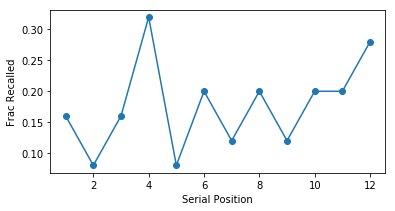

In [173]:
#For storing our output
sp_pct = []

#Find out what serial positions are represented in our data
sps = word_evs['serialpos'].unique()

#Compute recall rate for each serial position
for s in sps:
    pos_evs = word_evs.query('serialpos==@s')
    frac = np.sum(pos_evs['recalled'])/len(pos_evs)
    sp_pct.append(frac)
    
#Plot results
%matplotlib inline
from pylab import *
figure(figsize=(6, 3)); ax=subplot(111)
plot(np.arange(1, 13), sp_pct, 'o-')
ylabel('Frac Recalled'); xlabel('Serial Position')

**Exercise: Plot the distribution of inter-response times for R1001P's recalled words**

Text(0.5,1,'Second Attempt')

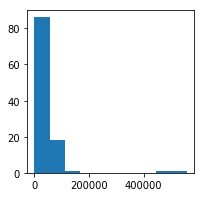

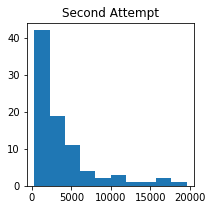

In [190]:
rec_evs = evs[evs['type']=='REC_WORD']
irts = np.diff(rec_evs['mstime'])

figure(figsize=(3, 3));
hist(irts, 10);

#But we don't want the inter-list intervals, since they're artificially long. So break up the analysis by list...
list_irts = []
for l in rec_evs['list'].unique():
    list_data = rec_evs[rec_evs['list']==l]
    list_irts.extend(np.diff(list_data['mstime']))
    
figure(figsize=(3, 3));
hist(list_irts, 10);
title('Second Attempt')